### EDA

In [114]:
import pandas as pd
df = pd.read_csv('C:/Users/Akhil/Desktop/interns_task-main/taskdata.csv')
df.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


In [50]:
df.dtypes

user_id                    int64
account_id               float64
max_return_days            int64
average_return_days      float64
customer_since_months      int64
total_revenue            float64
average_revenue          float64
avg_vas_count            float64
avg_used_vas_value       float64
business_type              int64
avg_wallet_bonus         float64
avg_active_ads           float64
avg_new_ads              float64
avg_email_replies        float64
avg_call_replies         float64
avg_sms_replies          float64
target                     int64
dtype: object

In [51]:
df.isnull().sum()

user_id                  0
account_id               7
max_return_days          0
average_return_days      0
customer_since_months    0
total_revenue            0
average_revenue          0
avg_vas_count            0
avg_used_vas_value       0
business_type            0
avg_wallet_bonus         0
avg_active_ads           0
avg_new_ads              0
avg_email_replies        0
avg_call_replies         0
avg_sms_replies          0
target                   0
dtype: int64

In [52]:
df = df.drop(['user_id','account_id'], axis = 1)
df.head()

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


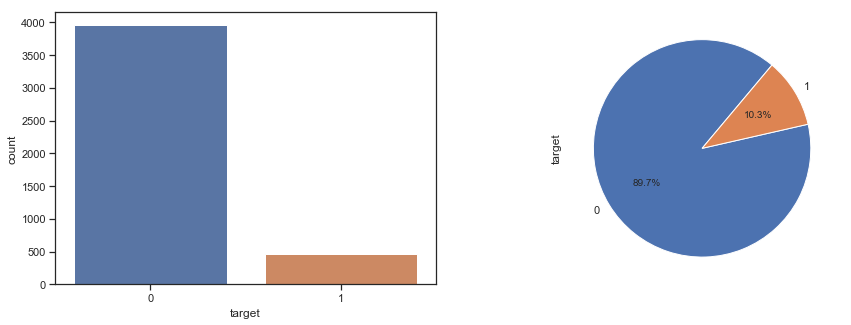

In [102]:
fig, axs = plt.subplots(1,2, figsize = (15,5))
plt1 = sns.countplot(df['target'], ax = axs[0])

pie_churn =df['target'].value_counts()
pie_churn.plot.pie( subplots=True,labels = pie_churn.index.values, autopct='%1.1f%%', figsize = (15,5), startangle= 50, ax = axs[1])
# Unsquish the pie.
plt.gca().set_aspect('equal')

plt.show()

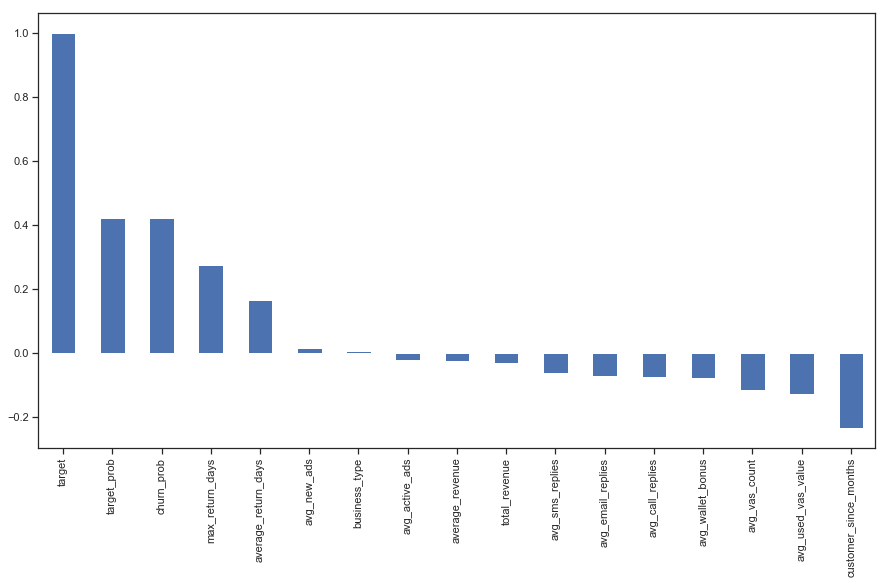

In [103]:
#Get Correlation of "target" with other variables:

plt.figure(figsize=(15,8))
df.corr()['target'].sort_values(ascending = False).plot(kind='bar')

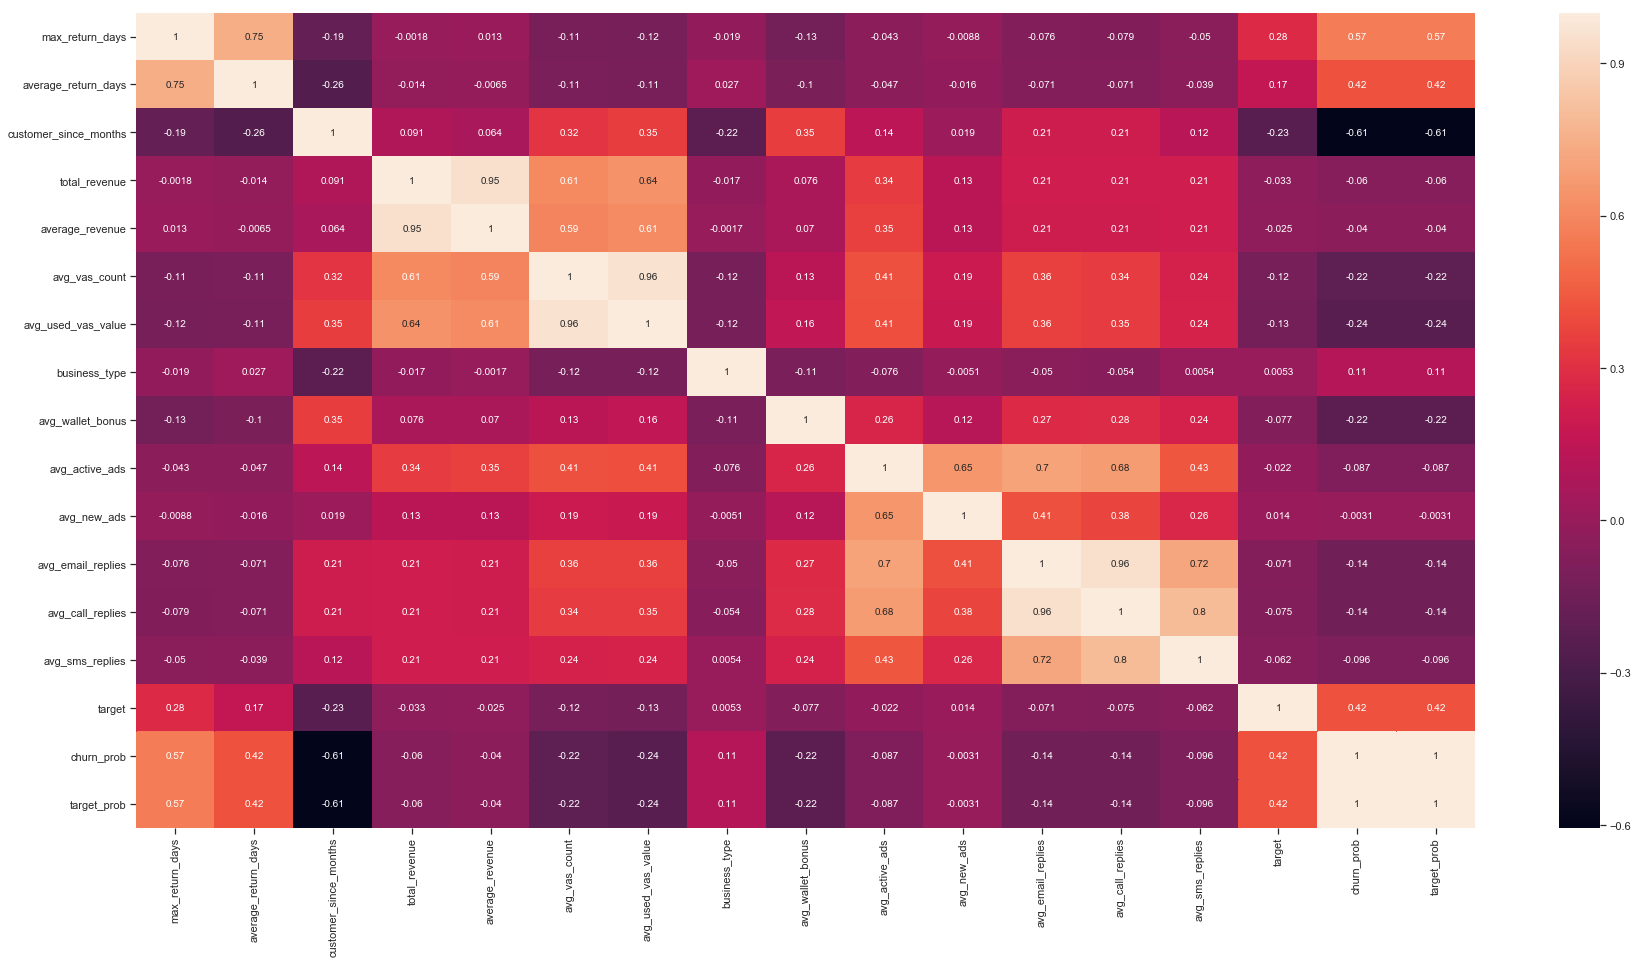

In [104]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

### MODEL BUILDING

In [53]:
from sklearn.preprocessing import LabelEncoder

def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [54]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


In [56]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_recall_fscore_support
import pickle
import scikitplot as skplt
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import make_scorer


In [57]:
X = df.drop('target', axis = 1, inplace = False)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print("Training target distribution:\n{}".format(y_train.value_counts()))
print("\nTesting target distribution:\n{}".format(y_test.value_counts()))


Training target distribution:
0    2770
1     314
Name: target, dtype: int64

Testing target distribution:
0    1182
1     141
Name: target, dtype: int64


In [58]:
def xgb_f1(y, t):
    #
    # Function to evaluate the prediction based on F1 score, this will be used as evaluation metric when training xgboost model
    # Args:
    #   y: label
    #   t: predicted
    #
    # Return:
    #   f1: F1 score of the actual and predicted
    #
    t = t.get_label()
    y_bin = [1. if y_cont > 0.5 else 0. for y_cont in y]   # change the prob to class output
    return 'f1', f1_score(t, y_bin)


def plot_evaluation_metric (y_true, y_prob):
    #
    # Function to plot the evaluation metric (cumulative gain, lift chart, precision and recall) on the screen
    # Args:
    #   y_true: array of y true label
    #   y_prob: array of y predicted probability (outcome of predict_proba() function)
    #
    # Return:
    #   None
    #
    skplt.metrics.plot_cumulative_gain(y_true, y_prob)
    plt.show();
    skplt.metrics.plot_precision_recall(y_true, y_prob)
    plt.show();
    skplt.metrics.plot_lift_curve(y_true, y_prob)
    plt.show();
    return 


def print_evaluation_metric (y_true, y_pred):
    #
    # Function to print out the model evaluation metrics
    # Args:
    #   y_true: array of y true label
    #   y_pred: array of y predicted class
    #
    # Return:
    #   None
    #
    precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_pred)
    print("Precision: {}".format(precision))
    print("Recall: {}".format(recall))
    print("F-score: {}".format(fscore))
    print("Support: {}".format(support))
    return 


def get_confusion_matrix (y_true, y_pred, save=0, filename="this.csv"):
    #
    # Function to print out the confusion matrix on screen as well as print to csv file, if enabled
    # Args:
    #   y_true: array of y true label
    #   y_pred: array of y prediction
    #   save: to enable the write to csv file (default = 0)
    #   filename: the name of the file to be saved (default = this.csv)
    #
    # Return:
    #   None
    #
    from sklearn.metrics import confusion_matrix
    get_ipython().magic('matplotlib inline')
    cm = pd.DataFrame(confusion_matrix(y_true, y_pred),
                      columns = ['Predicted False', 'Predicted True'],
                      index = ['Actual False', 'Actual True']
                      )
    display(cm)
    if(save):
        cm.to_csv(filename, index = True)
    
    return 


def my_plot_roc_curve (y_true, y_prob, filename="img.png", dpi = 200):
    #
    # Function to plot the ROC curve by computing fpr and tpr as well as save the plot to file
    # Args:
    #   y_true: array of y true label
    #   y_prob: the output of y probability prediction (outcome for predict_proba() function)
    #   filename: the name of the file to be saved
    #   dpi: the resolution of the figure
    # Return:
    #   None
    #
    fpr, tpr, threshold = roc_curve(y_true, y_prob[:, 1])
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.title("Receiver Operating Characteristic (ROC)")
    plt.plot(fpr, tpr, 'b')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    fig.savefig(filename, dpi = dpi)
    return


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return



In [59]:
classifiers = [XGBClassifier(n_jobs = 4)]

# iterate over classifiers
for item in classifiers:
    classifier_name = ((str(item)[:(str(item).find("("))]))
    print (classifier_name)
    
    # Create classifier, train it and test it.
    clf = item
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    print ("Score: ", round(score,3),"\nF1 score: ", round(f1_score(y_test, pred), 3), "\n- - - - - ", "\n")


XGBClassifier
Score:  0.909 
F1 score:  0.415 
- - - - -  



In [60]:
param_grid = {
    'silent': [False],
    'max_depth': [2, 3, 4, 5],
    'learning_rate': [0.001, 0.01, 0.1, 0.15],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'colsample_bylevel': [0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [0.5, 1.0, 3.0],
    'gamma': [0, 0.25, 0.5, 1.0],
    'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
    'n_estimators': [50, 100, 150],
    'scale_pos_weight': [1, 1.5, 2],
    'max_delta_step': [1, 2, 3]
}

clf = XGBClassifier(objective = 'binary:logistic')

In [61]:
fit_params = {'eval_metric': 'logloss',
              'early_stopping_rounds': 10,
              'eval_set': [(X_test, y_test)]}

rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=50,
                            n_jobs=4, verbose=2, cv=5,
                            fit_params=fit_params,
                            scoring= 'f1_macro', refit=True)


print("Randomized search..")

rs_clf.fit(X_train, y_train)
print("Randomized search time:")

best_score = rs_clf.best_score_
best_params = rs_clf.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Randomized search..
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   10.4s


[23:40:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-logloss:0.63487
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.58583
[2]	validation_0-logloss:0.54586
[3]	validation_0-logloss:0.51215
[4]	validation_0-logloss:0.48368
[5]	validation_0-logloss:0.45787
[6]	validation_0-logloss:0.43533
[7]	validation_0-logloss:0.41496
[8]	validation_0-logloss:0.39873
[9]	validation_0-logloss:0.38367
[10]	validation_0-logloss:0.37078
[11]	validation_0-logloss:0.35981
[12]	validation_0-logloss:0.34990
[13]	validation_0-logloss:0.34104
[14]	validation_0-logloss:0.33298
[15]	validation_0-logloss:0.32524
[16]	validatio

[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   14.8s finished


[63]	validation_0-logloss:0.25285
[64]	validation_0-logloss:0.25282
[65]	validation_0-logloss:0.25265
[66]	validation_0-logloss:0.25256
[67]	validation_0-logloss:0.25184
[68]	validation_0-logloss:0.25111
[69]	validation_0-logloss:0.25069
[70]	validation_0-logloss:0.25010
[71]	validation_0-logloss:0.24992
[72]	validation_0-logloss:0.24971
[73]	validation_0-logloss:0.24943
[74]	validation_0-logloss:0.24979
[75]	validation_0-logloss:0.24968
[76]	validation_0-logloss:0.24951
[77]	validation_0-logloss:0.24915
[78]	validation_0-logloss:0.24890
[79]	validation_0-logloss:0.24890
[80]	validation_0-logloss:0.24865
[81]	validation_0-logloss:0.24830
[82]	validation_0-logloss:0.24848
[83]	validation_0-logloss:0.24867
[84]	validation_0-logloss:0.24893
[85]	validation_0-logloss:0.24752
[86]	validation_0-logloss:0.24728
[87]	validation_0-logloss:0.24781
[88]	validation_0-logloss:0.24755
[89]	validation_0-logloss:0.24744
[90]	validation_0-logloss:0.24767
[91]	validation_0-logloss:0.24723
[92]	validatio

In [62]:
best_xgb = XGBClassifier(objective = 'binary:logistic',
                         colsample_bylevel = 0.7,
                         colsample_bytree = 0.8,
                         gamma = 1,
                         learning_rate = 0.15,
                         max_delta_step = 3,
                         max_depth = 4,
                         min_child_weight = 1,
                         n_estimators = 50,
                         reg_lambda = 10,
                         scale_pos_weight = 1.5,
                         subsample = 0.9,
                         silent = False,
                         n_jobs = 4
                        )

best_xgb.fit(X_train, y_train, eval_metric = xgb_f1, eval_set = [(X_train, y_train), (X_test, y_test)], 
             early_stopping_rounds = 20)

[23:41:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.09176	validation_1-error:0.10204	validation_0-f1:0.00000	validation_1-f1:0.00000
Multiple eval metrics have been passed: 'validation_1-f1' will be used for early stopping.

Will train until validation_1-f1 hasn't improved in 20 rounds.
[1]	validation_0-error:0.09566	validation_1-error:0.10129	validation_0-f1:0.00000	validation_1-f1:0.00000
[2]	validation_0-error:0.09403	validation_1-error:0.09977	validation_0-f1:0.00000	validation_1-f1:0.00000
[3]	validation_0-error:0.09209	validation_1-error:0.09826	validation_0-f1:0.00000	validation_1-f1:0.00000
[4]	validation_0-error:0.09176	valida

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
       colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.15, max_delta_step=3, max_depth=4,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=50, n_jobs=4, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=10, scale_pos_weight=1.5, silent=False, subsample=0.9,
       tree_method='exact', validate_parameters=1, verbosity=None)

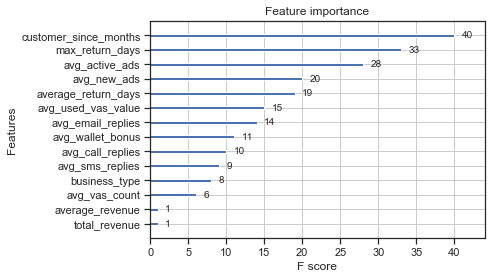

In [63]:
xgb.plot_importance(best_xgb, max_num_features = 15)
plt.show();

Precision: [0.90362375 0.61538462]
Recall: [0.99153976 0.11347518]
F-score: [0.94554256 0.19161677]
Support: [1182  141]


,Predicted False,Predicted True
Actual False,1172,10
Actual True,125,16


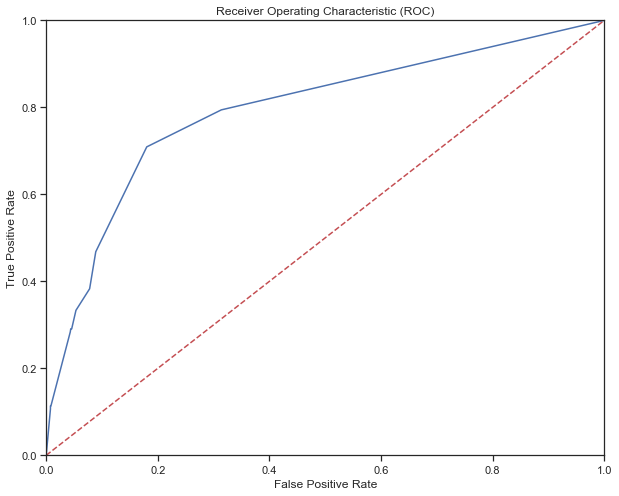

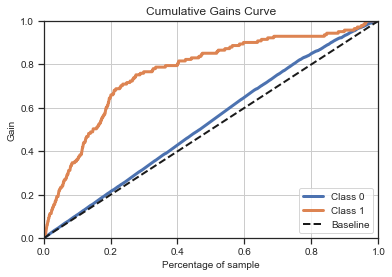

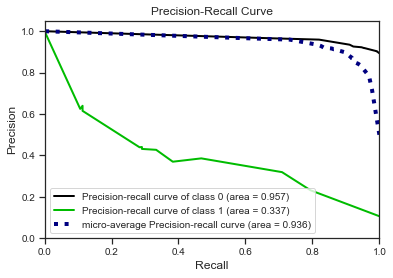

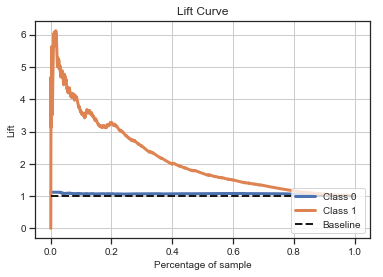

In [64]:
y_pred = best_xgb.predict(X_test)
y_prob = best_xgb.predict_proba(X_test)
print_evaluation_metric(y_test, y_pred)
get_confusion_matrix (y_test, y_pred, save=0, filename="this.csv")
my_plot_roc_curve (y_test, y_prob, filename="ROC.png", dpi = 200)
plot_evaluation_metric (y_test, y_prob)

In [65]:
from sklearn.metrics import classification_report
ev = classification_report(y_test, y_pred, target_names = ['0', '1'])
print(ev)

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      1182
           1       0.62      0.11      0.19       141

   micro avg       0.90      0.90      0.90      1323
   macro avg       0.76      0.55      0.57      1323
weighted avg       0.87      0.90      0.87      1323



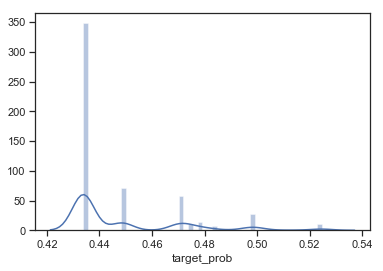

In [75]:
y_all_prob = best_xgb.predict_proba(X)
df['target_prob'] = y_all_prob[:, 1]
sns.distplot(df['target_prob'])
plt.show();

### SHAP

In [70]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_train)

In [71]:
shap.force_plot(explainer.expected_value, shap_values, X_train)

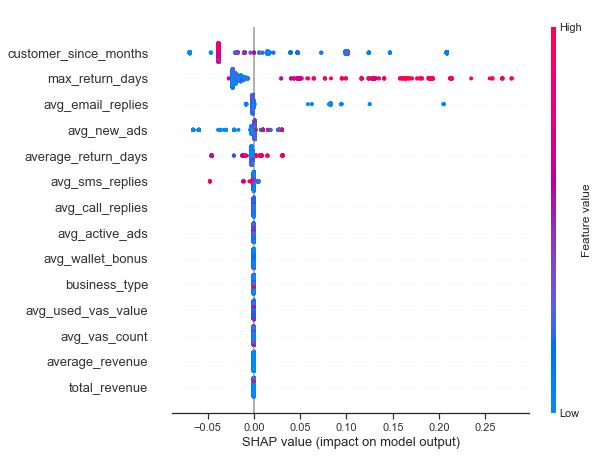

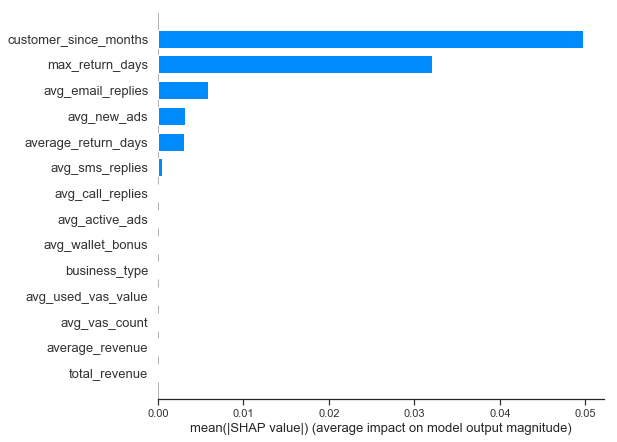

In [72]:
shap.summary_plot(shap_values, X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

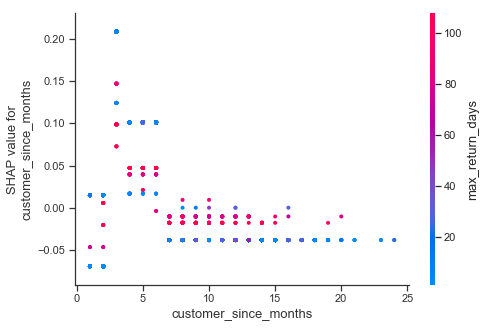

In [77]:
shap.dependence_plot("customer_since_months", shap_values, X_train, interaction_index="max_return_days")

In [48]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], link="logit")